<a href="https://colab.research.google.com/github/fitronansori/bmi_analisis_2001010068/blob/main/Analisis_BMI_2001010068.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#CONNECT TO GOOGLE DRIVE
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
# Import library

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [23]:
# Import data
df= pd.read_csv("/content/drive/My Drive/Data/bmi.csv")
print(df.sample(frac=0.1)) # ini hanya akan mencetak 10% dari total data yaitu: 10% dari df

     Gender  Height  Weight  Index
433    Male     179     127      4
496  Female     184     121      4
408  Female     146     123      5
230  Female     186     137      4
395  Female     164      71      3
416  Female     152     114      5
40   Female     175     120      4
379    Male     176      87      3
76     Male     165     104      4
337  Female     164     126      5
134  Female     171     155      5
475    Male     183     131      4
177  Female     181      94      3
323    Male     187     140      5
269    Male     168      50      1
105    Male     195     126      4
119  Female     176     156      5
441    Male     182      73      2
480  Female     155     115      5
375  Female     150     144      5
338  Female     189     125      4
344    Male     170     115      4
13     Male     155      51      2
74   Female     185     100      3
325  Female     148      54      2
178  Female     166     126      5
448  Female     146     101      5
175  Female     185 

In [24]:
# Mengubah kolom Gender menjadi nilai biner 
df=pd.get_dummies(df)
print(df)

     Height  Weight  Index  Gender_Female  Gender_Male
0       174      96      4              0            1
1       189      87      2              0            1
2       185     110      4              1            0
3       195     104      3              1            0
4       149      61      3              0            1
..      ...     ...    ...            ...          ...
495     150     153      5              1            0
496     184     121      4              1            0
497     141     136      5              1            0
498     150      95      5              0            1
499     173     131      5              0            1

[500 rows x 5 columns]


In [8]:
X=df.iloc[:,[0,1,3,4]].values
Y=df.iloc[:,2].values

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efd95ae7190>,
      dtype=object)

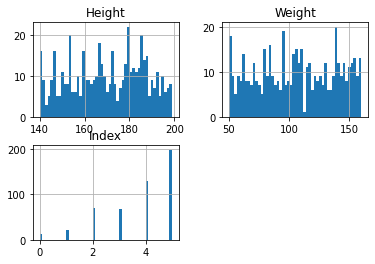

In [9]:
X_nu=df[["Height","Weight","Index"]]

X_nu.corr()

X_nu.hist(bins=50)

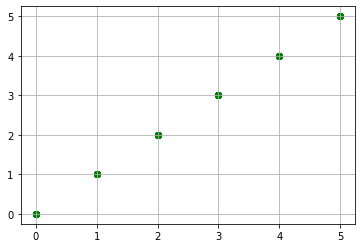

In [10]:
plt.scatter(X_nu.Index,Y,color="g")
plt.grid()

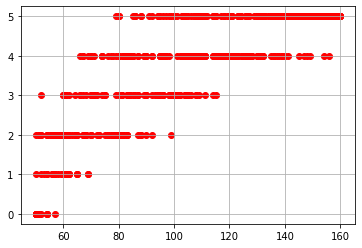

In [11]:
plt.scatter(X_nu.Weight,Y,color="r")
plt.grid()

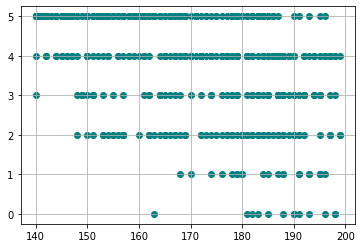

In [12]:
plt.scatter(X_nu.Height,Y,color="teal")
plt.grid()

In [13]:
# Memisahkan set data untuk melatih dan menguji set
X_train=X[:400]
X_test=X[400:]

Y_train=Y[:400]
Y_test=Y[400:]

In [14]:
from sklearn.linear_model import LinearRegression
teacher=LinearRegression()
learner=teacher.fit(X_train,Y_train)

In [25]:
# Membuat Prediksi

Yp=learner.predict(X_test)
c=learner.intercept_
m=learner.coef_
print("c is {}  \n m is {}  \n Yp is {}".format(c,m,Yp))

c is 6.211658282876165  
 m is [-0.03533902  0.03361792 -0.04167476  0.04167476]  
 Yp is [2.77513712 3.70145988 2.17488481 3.97900875 3.80323049 5.76328363
 1.96629289 5.22975606 5.14548968 4.77488836 1.81025107 3.3103858
 5.03412875 5.65755971 4.08440211 3.49224425 4.6308943  2.59660828
 4.89874023 1.96566918 1.32956675 6.2140854  4.50514079 3.47675427
 1.91971035 1.79241628 4.34972268 3.93191512 3.3516924  3.53274659
 2.53545264 5.58688166 4.13006778 4.19712308 2.50670489 5.62800772
 5.23429567 5.02896543 1.79476109 5.44724668 3.99134966 2.27573856
 6.20892207 5.79001711 3.90001831 5.34093645 3.44708967 4.01808314
 4.40589554 5.50902603 5.80642395 3.11728385 4.26545631 1.5025265
 2.35875752 2.62224437 3.82934026 2.77594137 3.53417455 4.60943676
 4.06265141 5.31936629 1.81025107 5.78595119 2.46305348 4.93924257
 2.85442071 5.90291862 4.42981052 2.92055914 5.83224057 4.57632993
 2.06480182 4.5057645  2.9241819  4.19023864 5.14812765 2.50326268
 2.6827763  4.57226401 4.55849514 3.72240

In [16]:
# Konversi daftar tipe data
xlist=list(X_train)
ylist=list(Y_train)
yplist=list(Yp)

In [17]:
mytable=pd.DataFrame({"input":xlist,"out":ylist})
print(mytable)

                input  out
0     [174, 96, 0, 1]    4
1     [189, 87, 0, 1]    2
2    [185, 110, 1, 0]    4
3    [195, 104, 1, 0]    3
4     [149, 61, 0, 1]    3
..                ...  ...
395   [164, 71, 1, 0]    3
396   [187, 96, 0, 1]    3
397  [169, 136, 0, 1]    5
398   [149, 61, 1, 0]    3
399  [163, 137, 0, 1]    5

[400 rows x 2 columns]


In [18]:
from sklearn.metrics import mean_squared_error,accuracy_score
Error=mean_squared_error(Yp,Y_test)
np.sqrt(Error)

0.5791091027138876

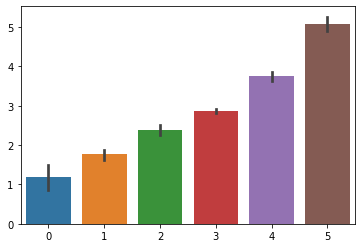

In [19]:
import seaborn as sns
sns.barplot(x=Y_test,y=Yp,data=df)

In [20]:
y_pred_cls=np.zeros_like(Yp)
y_pred_cls[Yp>2.5]=1

y_test_cls=np.zeros_like(Yp)
y_test_cls[Y_test>2.5]=1

In [26]:
#Hasil Akurasi Data

print(accuracy_score(y_test_cls,y_pred_cls))

0.93
